In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.impute import SimpleImputer 
from sklearn.metrics import accuracy_score

In [72]:
# loading the dataset to a Pandas DataFrame
wine_dataset = pd.read_excel(r'D:\DS & ML\wine.xlsx')

In [73]:
# number of rows & columns in the dataset
wine_dataset.shape

(1599, 12)

In [74]:
# first 5 rows of the dataset
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [75]:
# checking for missing values
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [76]:
# statistical measures of the dataset
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1598.000000,1599.000000,1598.000000,1599.000000,1599.000000,1598.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.876249,0.001887,0.080346,0.169507,1.065668,0.807665
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


In [102]:
wine_dataset_clean = wine_dataset.dropna()

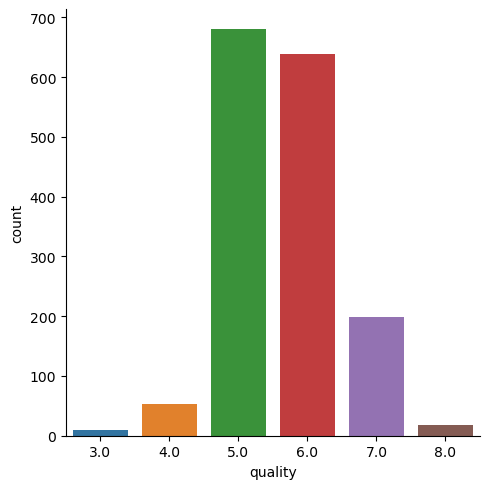

In [103]:
# number of values for each quality
sns.catplot(x='quality', data = wine_dataset, kind = 'count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

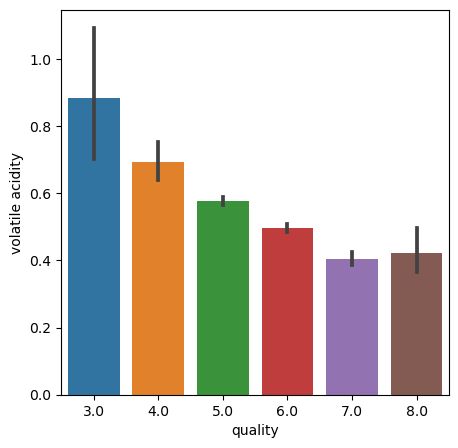

In [104]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = wine_dataset)

<Axes: xlabel='quality', ylabel='citric acid'>

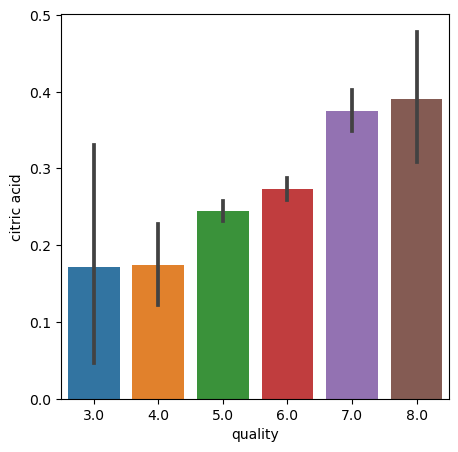

In [105]:
# citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = wine_dataset)

In [106]:
correlation = wine_dataset.corr()

<Axes: >

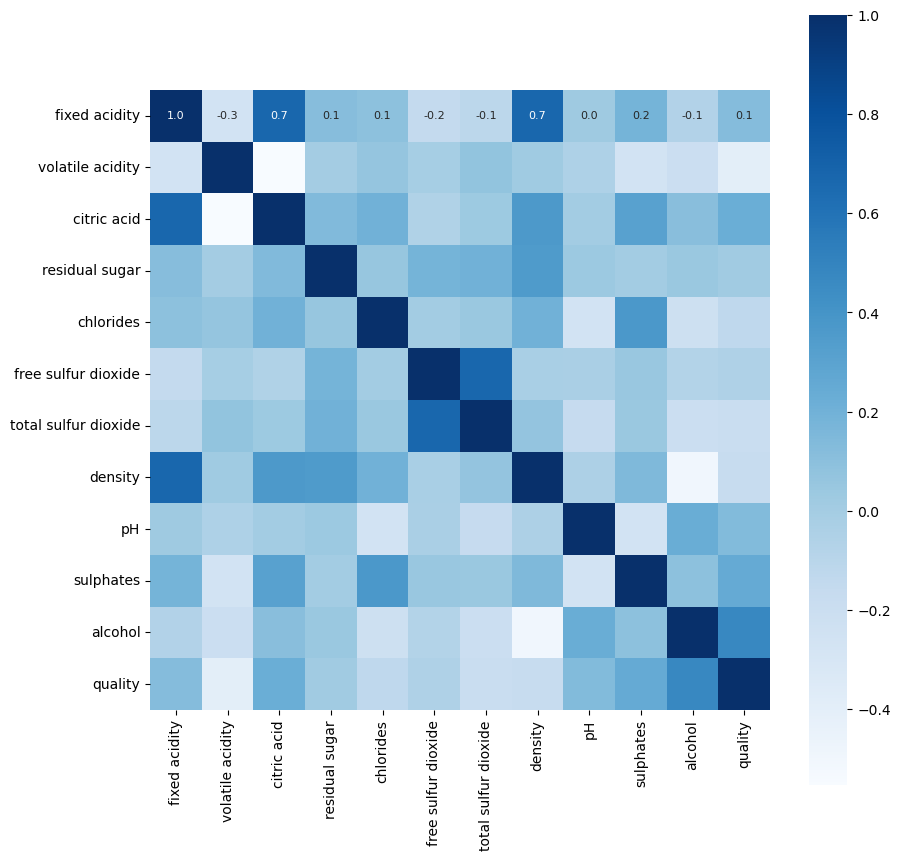

In [107]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

In [108]:
# separate the data and Label
X = wine_dataset.drop('quality',axis=1)

In [109]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [110]:
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [111]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [114]:
X_clean = wine_dataset_clean.drop('quality', axis=1)
Y_clean = wine_dataset_clean['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)


In [115]:
X_train_clean, X_test_clean, Y_train_clean, Y_test_clean = train_test_split(X_clean, Y_clean, test_size=0.2)

In [116]:
print(Y.shape, Y_train.shape, Y_test.shape)




(1599,) (1279,) (320,)


In [117]:
imputer = SimpleImputer(strategy='mean')  # Instantiate SimpleImputer
X_train_imputed = imputer.fit_transform(X_train)  # Fit and transform on training data
X_test_imputed = imputer.transform(X_test)  # Transform testing data


In [118]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [119]:
print("NaN values in X_train_imputed:", np.isnan(X_train_imputed).sum())
print("NaN values in X_test_imputed:", np.isnan(X_test_imputed).sum())


NaN values in X_train_imputed: 0
NaN values in X_test_imputed: 0


In [120]:
print("Data types of features:")
print(X_train.dtypes)

Data types of features:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object


In [121]:
print("Infinite values in the dataset:", np.any(np.isinf(X_train_imputed)))
print("Extreme values (>1e10) in the dataset:", np.any(np.abs(X_train_imputed) > 1e10))

Infinite values in the dataset: False
Extreme values (>1e10) in the dataset: False


In [122]:
print("NaN values in Y_train:", Y_train.isnull().sum())

NaN values in Y_train: 0


In [123]:
print("Shape of X_train_imputed:", X_train_imputed.shape)
print("Shape of Y_train:", Y_train.shape)


Shape of X_train_imputed: (1279, 11)
Shape of Y_train: (1279,)


In [124]:
print("NaN values in X_train_imputed:", np.isnan(X_train_imputed).sum())

NaN values in X_train_imputed: 0


In [125]:
print("Unique values in Y_train:", np.unique(Y_train))
print("Unique values in Y_test:", np.unique(Y_test))


Unique values in Y_train: [0 1]
Unique values in Y_test: [0 1]


In [126]:
model_clean = RandomForestClassifier()


In [128]:
model_clean.fit(X_train_clean, Y_train_clean)

RandomForestClassifier()

In [129]:
# accuracy on test data
X_test_prediction = model_clean.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [130]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.984375


In [132]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model_clean.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine


C:\Users\sachi\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
